In [10]:
import numpy as np
from ecp import e_divisive,e_agglomerative
import time
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
df = pd.read_csv('DATA.csv')
X = df.iloc[:,1:]
X.head()

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
start= time.time()
py_divise = e_divisive.e_divisive(X = X, R=199, alpha = 1)
end = time.time()
print(py_divise)
print(end-start)

{'k_hat': 3, 'order_found': [0, 700, 300, 500], 'estimates': [0, 300, 500, 700], 'considered_last': 387, 'p_values': [0.005, 0.005, 0.36], 'permutations': [199, 199, 199], 'cluster': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0

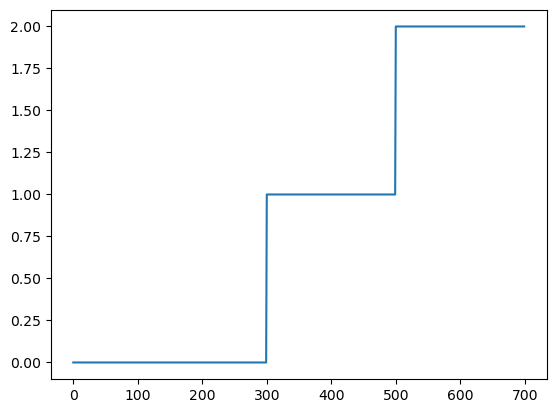

In [11]:
plt.plot(py_divise['cluster'])

In [13]:
import time  # for execution time comparison

import matplotlib.pyplot as plt  # for display purposes

import ruptures as rpt  # our package
from ruptures.metrics import hausdorff
import numpy as np

signal  = X.to_numpy()
n_bkps = 2
#algo_python = rpt.Dynp(model="l2", jump=1, min_size=2).fit(
 #   signal
#)  # written in pure python
algo_c = rpt.KernelCPD(kernel="linear", min_size=2).fit(signal)  # written in C

for label, algo in zip(
    ("Python implementation", "C implementation"), (algo_c, algo_c)
):
    start_time = time.time()
    result = algo.predict(n_bkps=n_bkps)
    print(f"{label}:\t{time.time() - start_time:.3f} s")

#bkps_python = algo_python.predict(n_bkps=n_bkps)
bkps_c = algo_c.predict(n_bkps=n_bkps)
#print(f"Python implementation:\t{bkps_python}")
print(f"C implementation:\t{bkps_c}")

Python implementation:	0.078 s
C implementation:	0.000 s
C implementation:	[300, 500, 700]


In [6]:
n_bkps = 2
params = {"gamma": 1e-2}
algo_python = rpt.Dynp(model="rbf", params=params, jump=1, min_size=2).fit(
    signal
)  # written in pure python
algo_c = rpt.KernelCPD(kernel="rbf", params=params, min_size=2).fit(
    signal
)  # written in C

for label, algo in zip(
    ("Python implementation", "C implementation"), (algo_python, algo_c)
):
    start_time = time.time()
    result = algo.predict(n_bkps=n_bkps)
    print(f"{label}:\t{time.time() - start_time:.3f} s")


bkps_python = algo_python.predict(n_bkps=n_bkps)
bkps_c = algo_c.predict(n_bkps=n_bkps)
print(f"Python implementation:\t{bkps_python}")
print(f"C implementation:\t{bkps_c}")


Python implementation:	35.015 s
C implementation:	0.223 s
Python implementation:	[100, 300, 900]
C implementation:	[100, 300, 900]


In [7]:
bkps_python = algo_python.predict(n_bkps=n_bkps)
bkps_c = algo_c.predict(n_bkps=n_bkps)
print(f"Python implementation:\t{bkps_python}")
print(f"C implementation:\t{bkps_c}")
#print(f"(Hausdorff distance: {hausdorff(bkps_python, bkps_c):.0f} samples)")

Python implementation:	[4, 100, 300, 700]
C implementation:	[4, 100, 300, 700]


In [49]:
import changepoint as cpt

[0, 259, 282, 465, 490]


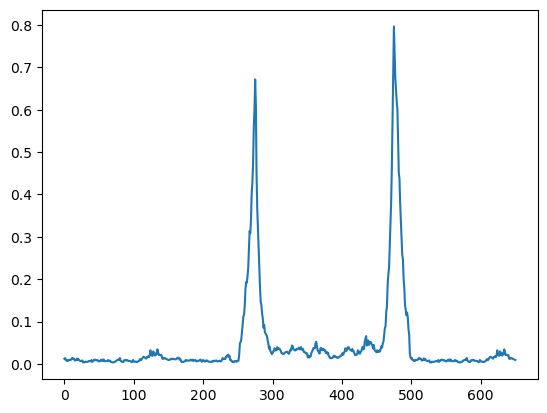

In [67]:
import random
import numpy as np

cpd = cpt.Bocpd(prior=cpt.NormalGamma(),lam=150)
df_one = pd.read_csv('df_out.csv').iloc[:,1]

df_one.plot()
X_1 = df_one
n = len(X_1)


change_point_history = np.zeros((n, n))
for i, x in enumerate(X_1):
    change_point_history[i, : i + 1] = cpd.step(x)#cpd.step(x)

print(cpt.map_changepoints(change_point_history))